In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
########### REAL RFDT DATA GOES HERE ##############

# Data for Random Forest model errors
RF_model_errors = np.random.random_sample(400,)*1.5
# Data for Random Forest absolute residuals
RF_abs_res = np.random.random_sample(400,)
# Value of Dataset Standard Deviation
RF_stdev = 0.4738 # Actual value is 0.4738

In [3]:
# Divide RF data by RF standard deviation
RF_model_errors = RF_model_errors/RF_stdev
RF_abs_res = RF_abs_res/RF_stdev

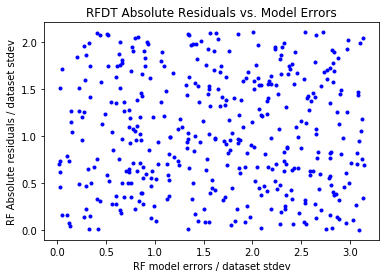

In [4]:
# Create initial scatter plot
plt.xlabel("RF model errors / dataset stdev")
plt.ylabel("RF Absolute residuals / dataset stdev")
plt.title("RFDT Absolute Residuals vs. Model Errors")
plt.plot(RF_model_errors, RF_abs_res, '.', color='blue');

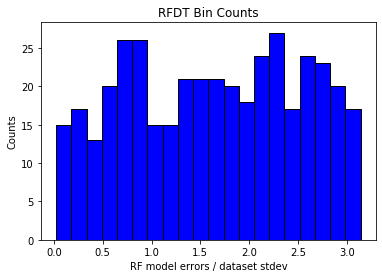

In [5]:
# Set number of bins for RMS calculation
RF_number_of_bins = 20
# Histogram of RF error bin counts
plt.hist(RF_model_errors, bins=RF_number_of_bins, color='blue', edgecolor='black')
plt.xlabel("RF model errors / dataset stdev")
plt.ylabel("Counts")
plt.title("RFDT Bin Counts");

In [6]:
# Set bins for calculating RMS
RF_upperbound = np.amax(RF_model_errors)
RF_lowerbound = np.amin(RF_model_errors)
RF_bins = np.linspace(RF_lowerbound, RF_upperbound, RF_number_of_bins)
# Create a vector determining bin of each data point
RF_digitized = np.digitize(RF_model_errors, RF_bins)
# Calculate RMS of the absolute residuals
RF_RMS_abs_res = [np.sqrt((RF_abs_res[RF_digitized == i]**2).mean()) for i in range(1, len(RF_bins))]

In [7]:
# Set the x-values to the midpoint of each bin
RF_start = (RF_bins[0] + RF_bins[1]) / 2
RF_end = RF_bins[len(RF_bins) - 1] - RF_start
RF_binned_model_errors = np.linspace(RF_start, RF_end, len(RF_bins) - 1)

In [8]:
# Fit a line to the data
RF_model = LinearRegression(fit_intercept=False)

RF_model.fit(RF_binned_model_errors[:, np.newaxis], RF_RMS_abs_res) #### SELF: Can indicate subset of points to fit to using ":" --> "a:b"

RF_xfit = np.linspace(0, RF_upperbound, RF_number_of_bins - 1)
RF_yfit = RF_model.predict(RF_xfit[:, np.newaxis])

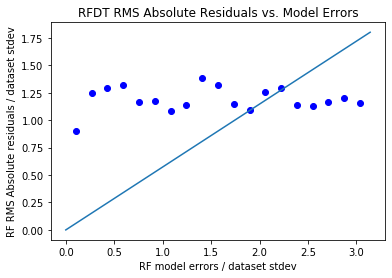

In [9]:
# Create RMS scatter plot
plt.xlabel("RF model errors / dataset stdev")
plt.ylabel("RF RMS Absolute residuals / dataset stdev")
# plt.ylim(0,1)
plt.title("RFDT RMS Absolute Residuals vs. Model Errors")
plt.plot(RF_binned_model_errors, RF_RMS_abs_res, 'o', color='blue')
plt.plot(RF_xfit, RF_yfit);

In [10]:
r2_score(RF_RMS_abs_res, RF_yfit)

-32.68521956794408